In [2]:
#  独立同一分布
# →互いに独立で同じ確率分布に従う多次元確率変数
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(0)
%precision 3
%matplotlib inline

In [11]:
# 離散型確率変数に対するいくつかの関数を用意しておく
linestyles = ['-', '--', ':', '-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY =XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                  for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [12]:
# n個の確率変数が互いに独立 = 同時確率が周辺確率の積と等しい
# 相関係数も複数の確率変数の関係性を表す指標である。
# しかし、無相関なとき = 互いに独立 は必ずしも成り立たない
# 逆に、互いに独立 = 無相関 は成り立つ
# つまり、独立の方が無相関より、より強い概念である

# 独立な確率変数としていかさまサイコロを考える
x_set = np.array([1, 2, 3, 4, 5, 6])
y_set = np.array([1, 2, 3, 4, 5, 6])

def f_XY(x, y):
    if x in x_set and y in y_set:
        return x*y / 441
    else:
        return 0
    
XY = [x_set, y_set, f_XY]

In [13]:
# この2次元確率変数X、Yは独立なので、無相関になっているはず
Cov(XY)

-8.326672684688674e-17

In [14]:
# 無相関だが独立ではない(X、Y)の例
x_set = np.array([0, 1])
y_set = np.array([-1, 0, 1])

def f_XY(x, y):
    if (x, y) in [(0,0), (1, 1), (1, -1)]:
        return 1/3
    else:
        return 0
XY = [x_set, y_set, f_XY]

In [15]:
# 共分散を計算
Cov(XY)

0.0

In [16]:
f_X(0) * f_Y(0), f_XY(0,  0)

(0.1111111111111111, 0.333)

In [17]:
# 正規分布の和の分布を考える
rv1 = stats.norm(1, np.sqrt(2))
rv2 = stats.norm(2, np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

np.mean(sum_sample), np.var(sum_sample)

(3.0026658204893835, 4.9960524321119335)

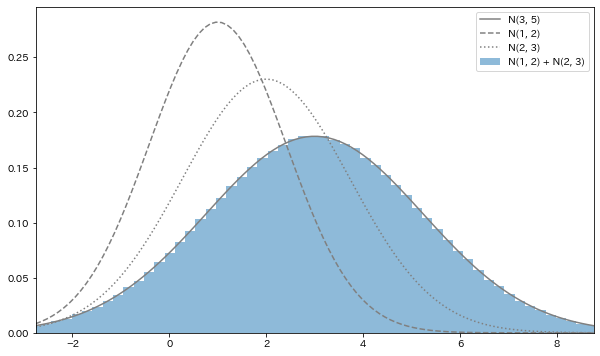

In [20]:
# 同じ確率分布に従う2つの独立な確率変数に対して
# その和もまた同じ確率分布になる性質を「再生性」という
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)

ax.hist(sum_sample, bins=100, density=True,
       alpha=0.5, label='N(1, 2) + N(2, 3)')
ax.plot(xs, rv.pdf(xs), label='N(3, 5)', color='gray')
ax.plot(xs, rv1.pdf(xs), label='N(1, 2)', ls='--', color='gray')
ax.plot(xs, rv2.pdf(xs), label='N(2, 3)', ls=':', color='gray')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))
plt.show()